# KNN for Alphabets

In [29]:
import numpy as np
import math
import pandas as pd
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, confusion_matrix, precision_score
from matplotlib.pyplot import *

In [3]:
#Create a function that generates features depending on the label
def label_features(label):
    if (label == 'A'):
        x = 1 + np.random.normal(0,1,1)
        y = 3 + np.random.normal(0,1,1)
    if (label == 'B'):
        x = 3 + np.random.normal(0,1,1)
        y = 5 + np.random.normal(0,1,1)
    if (label == 'C'):
        x = 5 + np.random.normal(0,1,1)
        y = 1 + np.random.normal(0,1,1)
    return x,y

In [19]:
#generate training set of 30 samples across labels
letters = []
for count in range(10):
    letters.append('A')
for count in range(10):
    letters.append('B')
for count in range(10):
    letters.append('C')

#all labels for classification
letters_array = np.array(letters)

In [17]:
#setup training dataset
train_data = []

for count in range(10):
    train_data.append(label_features('A'))
for count in range(10):
    train_data.append(label_features('B'))
for count in range(10):
    train_data.append(label_features('C'))
    
#x-data from train_data
x_train_temp = [x for x,y in train_data]
#convert x_train from list to 1D array
x_train = np.array(x_train_temp)
#print (x_train)

#y-data from train_data
y_train_temp = [y for x,y in train_data]
#convert y_train from list to 1D array
y_train = np.array(y_train_temp)
#print (y_train)

In [18]:
#create an array with x_train and y_train
xy_train = np.concatenate((x_train,y_train),1)
#print(xy_train)

In [24]:
#print ("Labels", letters_array)
#print ("X and Y values in training set", xy_train)

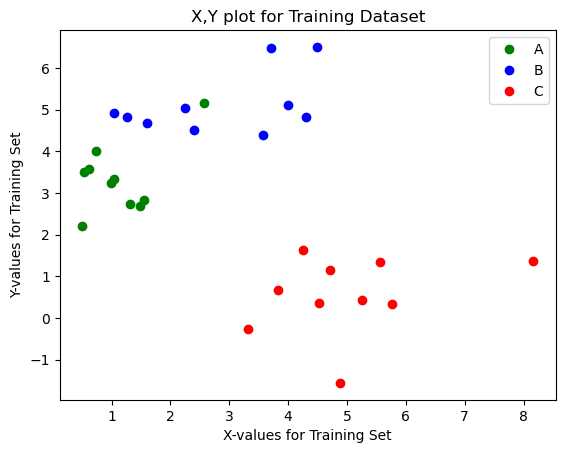

In [34]:
#Scatter Plot
%matplotlib inline
plot(x_train[0:10],y_train[0:10],'go', label='A')
plot(x_train[10:20],y_train[10:20],'bo', label='B')
plot(x_train[20:30],y_train[20:30],'ro', label='C')
xlabel('X-values for Training Set')
ylabel('Y-values for Training Set')
title ('X,Y plot for Training Dataset')
legend(loc='best')
show()





In [43]:
# setup 150 samples of test dataset
test_target = []
for count in range(50):
    test_target.append('A')
for count in range(50):
    test_target.append('B')
for count in range(50):
    test_target.append('C')

test_data = []
for count in range(50):
    test_data.append(label_features('A'))
for count in range(50):
    test_data.append(label_features('B'))
for count in range(50):
    test_data.append(label_features('C'))
    
#x-data from train_data
x_test_temp = [x for x,y in test_data]
#convert x_train from list to 1D array
x_test = np.array(x_test_temp)
#print (x_test)

#y-data from train_data
y_test_temp = [y for x,y in test_data]
#convert y_train from list to 1D array
y_test = np.array(y_test_temp)
#print (y_test)

#create an array with x_test and y_test
xy_test = np.concatenate((x_test,y_test),1)
#print(xy_test)

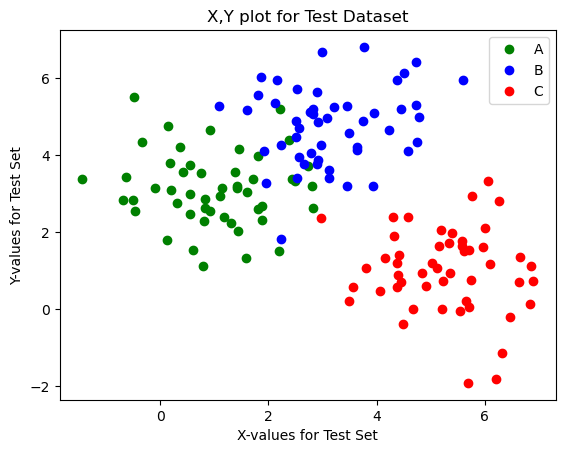

In [44]:
#testing data visual
#Scatter Plot
%matplotlib inline
plot(x_test[0:50],y_test[0:50],'go', label='A')
plot(x_test[50:100],y_test[50:100],'bo', label='B')
plot(x_test[100:150],y_test[100:150],'ro', label='C')
xlabel('X-values for Test Set')
ylabel('Y-values for Test Set')
title ('X,Y plot for Test Dataset')
legend(loc='best')
show()

# Create KNN classifier

In [53]:
#for K=1
from sklearn import neighbors
k1 = neighbors.KNeighborsClassifier(n_neighbors=1, weights='distance')
k1.fit(xy_train, letters_array)
k1_pred = k1.predict(xy_test)
#print(k1_pred)

# Metrics: Accuracy, Recall, Precision, and Confusion Matrix

In [54]:
accuracy_k1 = accuracy_score(test_target,k1_pred)
print ('Accuracy for k=1', accuracy_k1*100)

Accuracy for k=1 86.66666666666667


In [58]:
#Recall: ability to predict correctly
recall_k1 = recall_score(test_target,k1_pred,average='macro')
print ('Average Recall for k=1', recall_k1)

#precision
precision_k1 = precision_score(test_target,k1_pred, average='macro')
print ('Average Precision for k=1', precision_k1)

#Confusion Matrix
cm_k1 = confusion_matrix(test_target, k1_pred, labels=(['A','B','C']))
print ('Confusion Matrix for k=1') 
print (cm_k1)

Average Recall for k=1 0.8666666666666667
Average Precision for k=1 0.8679549114331723
Confusion Matrix for k=1
[[42  8  0]
 [12 38  0]
 [ 0  0 50]]


# K=3 fit

In [59]:
#for K=3
k3 = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')
k3.fit(xy_train, letters_array)
k3_pred = k3.predict(xy_test)
accuracy_k3 = accuracy_score(test_target, k3_pred)
print ('Accuracy for k=3', accuracy_k3*100)

#Recall: ability to predict correctly
recall_k3 = recall_score(test_target,k3_pred,average='macro')
print ('Average Recall for k=3', recall_k3)

#precision
precision_k3 = precision_score(test_target,k3_pred, average='macro')
print ('Average Precision for k=3', precision_k3)

#Confusion Matrix
cm_k3 = confusion_matrix(test_target, k3_pred, labels=(['A','B','C']))
print ('Confusion Matrix for k=3')
print (cm_k3)

Accuracy for k=3 89.33333333333333
Average Recall for k=3 0.8933333333333332
Average Precision for k=3 0.8947851153039833
Confusion Matrix for k=3
[[41  9  0]
 [ 6 44  0]
 [ 1  0 49]]


# K=9 fit

In [62]:
#for K=9
k9 = neighbors.KNeighborsClassifier(n_neighbors=9, weights='distance')
k9.fit(xy_train, letters_array)
k9_pred = k9.predict(xy_test)
accuracy_k9 = accuracy_score(test_target, k9_pred)
print ('Accuracy for k=9', accuracy_k9*100)

#Recall: ability to predict correctly
recall_k9 = recall_score(test_target,k9_pred,average='macro')
print ('Average Recall for k=9', recall_k9)

#precision
precision_k9 = precision_score(test_target,k9_pred, average='macro')
print ('Average Precision for k=9', precision_k9)

#Confusion Matrix
cm_k9 = confusion_matrix(test_target, k9_pred, labels=(['A','B','C']))
print ('Confusion Matrix for k=9')
print (cm_k9)

Accuracy for k=9 93.33333333333333
Average Recall for k=9 0.9333333333333332
Average Precision for k=9 0.9344863731656184
Confusion Matrix for k=9
[[44  6  0]
 [ 3 47  0]
 [ 1  0 49]]
